In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import hilbert

## 1. Local Maxima and Minima

In [2]:
N = 1000
time = np.linspace(-1,1,N)
signal = np.sinc(time*10) + np.linspace(0.5,-0.5,N)
R = signal + 0.1*np.random.randn(N)

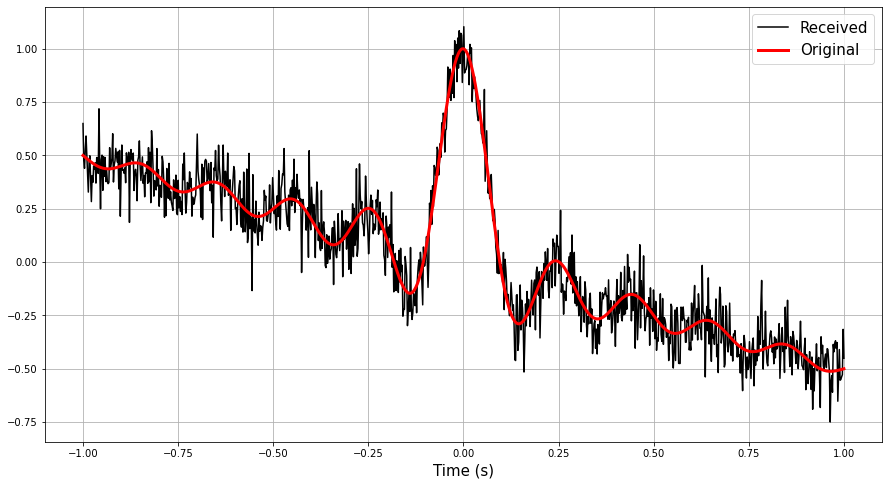

In [3]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'Received' , c='black')
plt.plot(time , signal , label = 'Original' , c='r' , linewidth = 3)
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 1.1. Global Maxima


In [4]:
gl_max_R = [time[np.argmax(R)] , np.max(R)]
gl_max_sig = [time[np.argmax(signal)] , np.max(signal)]

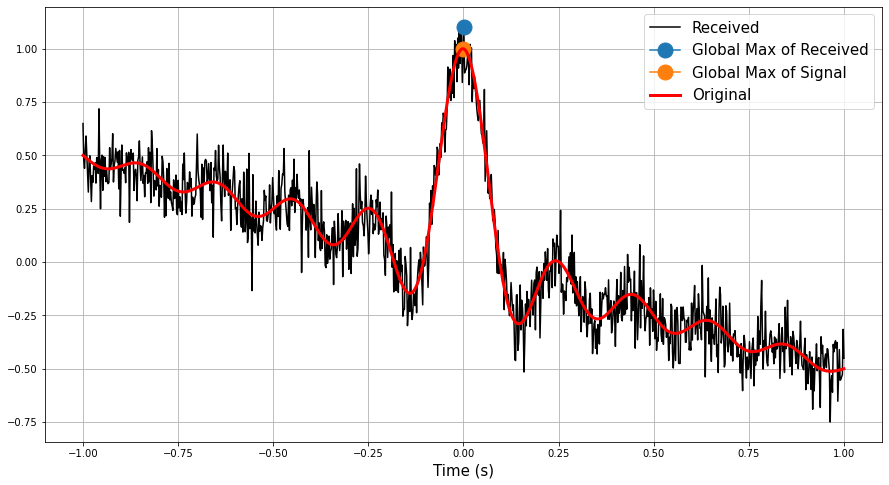

In [5]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'Received' , c='black')
plt.plot(gl_max_R[0] ,gl_max_R[1], marker='o' , markersize = 15,
        label = 'Global Max of Received')
plt.plot(gl_max_sig[0] ,gl_max_sig[1],marker='o' , markersize = 15,
        label = 'Global Max of Signal')
plt.plot(time , signal , label = 'Original' , c='r' , linewidth = 3)
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 1.2. Smoothing Before Finding the Maxima

In [6]:
R3 = np.append(R[::-1] , R)
R3 = np.append(R3 , R[::-1])
win_size = int(np.round(0.03*len(R)/2))
R_temp = np.zeros(len(R3))
for i in range(win_size , len(R3)-win_size):
    R_temp[i] = np.mean(R3[i-win_size:i+win_size])
R_smooth = R_temp[len(R):2*len(R)]
gl_max_R_smooth = [time[np.argmax(R_smooth)] , np.max(R_smooth)]

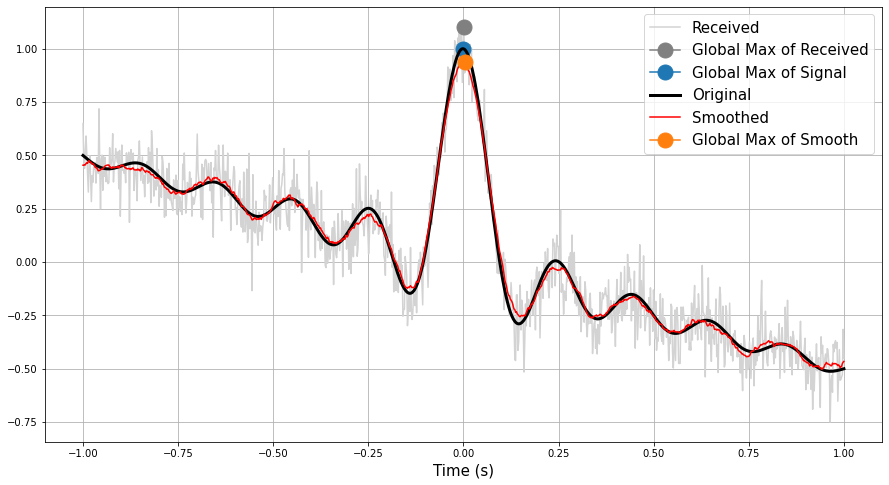

In [7]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'Received' , c='lightgrey')
plt.plot(gl_max_R[0] ,gl_max_R[1], marker='o' , markersize = 15,
        label = 'Global Max of Received' , c = 'grey')
plt.plot(gl_max_sig[0] ,gl_max_sig[1],marker='o' , markersize = 15,
        label = 'Global Max of Signal')
plt.plot(time , signal , label = 'Original' , c='black' , linewidth = 3)
plt.plot(time , R_smooth , label = 'Smoothed' , c='r')
plt.plot(gl_max_R_smooth[0] ,gl_max_R_smooth[1], marker='o' , markersize = 15,
        label = 'Global Max of Smooth')
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 1.3. Local Maxima

In [8]:
stage_1 = np.diff(R_smooth)
stage_13 = np.append(stage_1[::-1] , stage_1)
stage_13 = np.append(stage_13 , stage_1[::-1])
win_size = int(np.round(0.05*len(stage_1)/2))
stage_1_temp = np.zeros(len(stage_13))
for i in range(win_size , len(stage_13)-win_size):
    stage_1_temp[i] = np.mean(stage_13[i-win_size:i+win_size])
stage_2 = stage_1_temp[len(stage_1):2*len(stage_1)]
stage_3 = np.sign(stage_2)
stage_4 = np.diff(stage_3)
stage_5 = (stage_4<0)

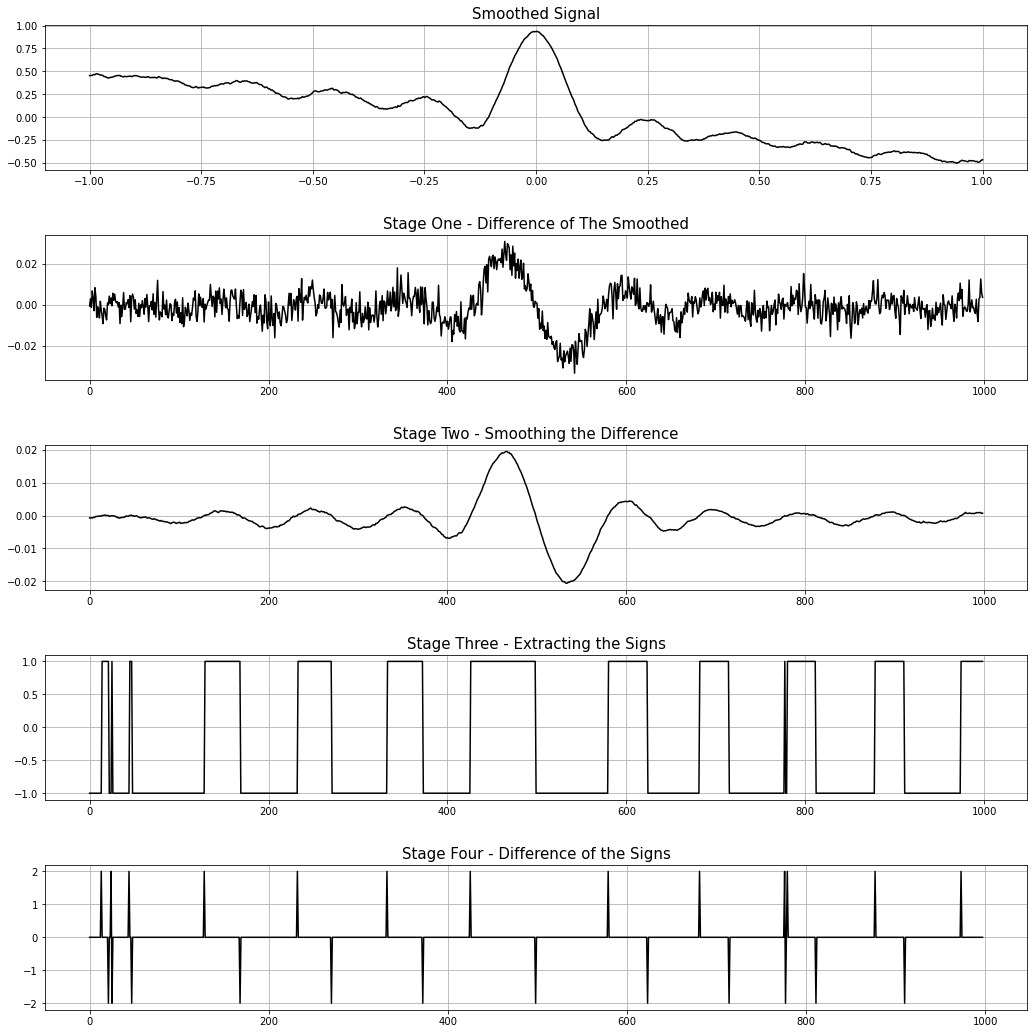

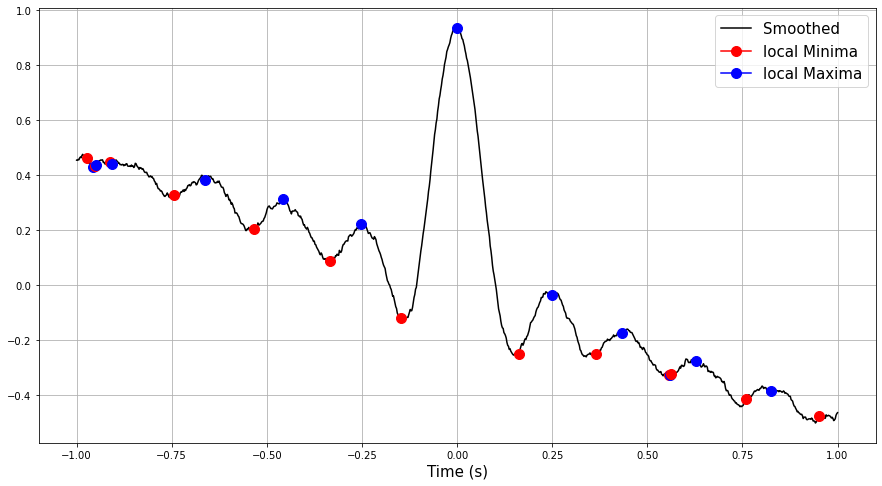

In [9]:
plt.figure(figsize = (15,15))
plt.subplot(5,1,1)
plt.plot(time , R_smooth , c = 'black')
plt.title('Smoothed Signal' , fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.subplot(5,1,2)
plt.plot(stage_1 , c = 'black')
plt.title('Stage One - Difference of The Smoothed' , fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.subplot(5,1,3)
plt.plot(stage_2 , c = 'black')
plt.title('Stage Two - Smoothing the Difference' , fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.subplot(5,1,4)
plt.plot(stage_3 , c = 'black')
plt.title('Stage Three - Extracting the Signs' , fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.subplot(5,1,5)
plt.plot(stage_4 , c = 'black')
plt.title('Stage Four - Difference of the Signs' , fontsize = 15)
plt.tight_layout(pad=3.0)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , R_smooth , label = 'Smoothed' , c='black')
temp = np.linspace(-1,1,len(stage_4))
state_max = 0 
state_min = 0 
for i in range(len(stage_4)):
    if stage_4[i] > 0:
        temp_max = R_smooth[np.argmin(np.abs(time-temp[i]))]
        if state_min == 0 :
            plt.plot(temp[i] , temp_max, marker='o' , markersize = 10 , c = 'r' , label = 'local Minima')
            state_min = 1
        else:
            plt.plot(temp[i] , temp_max, marker='o' , markersize = 10 , c = 'r')
    elif stage_4[i] < 0:
        temp_min = R_smooth[np.argmin(np.abs(time-temp[i]))]
        if state_max == 0 :
            plt.plot(temp[i] , temp_min, marker='o' , markersize = 10 , c = 'b' , label = 'local Maxima')
            state_max = 1
        else:
            plt.plot(temp[i] , temp_min, marker='o' , markersize = 10 , c = 'b')
            
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

## 2. Recovering Amplitude Signal 

In [10]:
sample_rate = 1000
time = np.arange(0,3,1/sample_rate)
Npnts = len(time)
Poly = 20

#### Signal:
ampod = interp1d(np.arange(Poly) , np.random.randn(Poly)*30 , kind='nearest')
signal = np.abs(ampod(np.linspace(1,Poly-1,Npnts)))
R = np.random.randn(Npnts)*signal

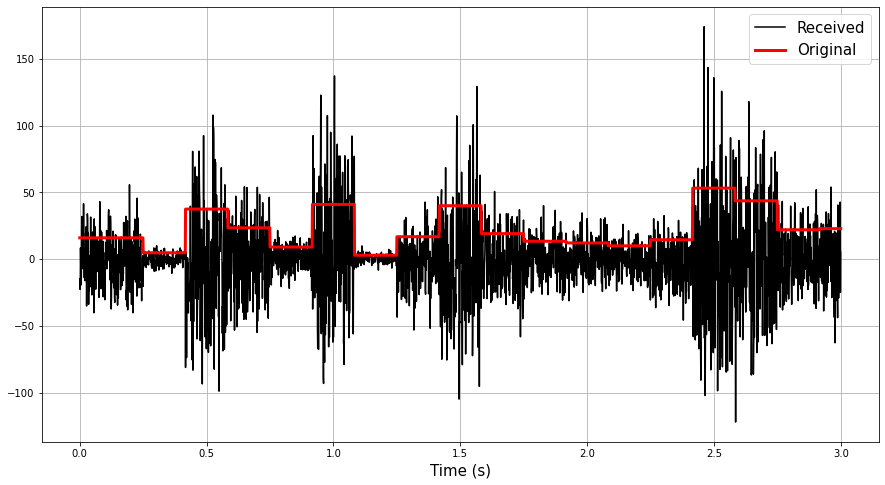

In [11]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'Received' , c='black')
plt.plot(time , signal , label = 'Original' , c='r' , linewidth = 3)
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 2.1.  Rectifying and lowpass Filter

In [12]:
k = 20
# Rectifying: 
rectsig = np.abs(R)
#low-pass: 
rect3 = np.append(rectsig[::-1] , rectsig)
rect3 = np.append(rect3 , rectsig[::-1])
rect3_smooth = np.zeros(len(rect3))
for i in range(k , len(rect3)-k):
    rect3_smooth[i] = np.mean(rect3[i-k:i+k])
rectsig_filt = rect3_smooth[len(rectsig):2*len(rectsig)]

### 2.2. Hilbert Filter

In [13]:
k = 20
maghilb = np.abs(hilbert(R))
#low-pass: 
rect3 = np.append(maghilb[::-1] , maghilb)
rect3 = np.append(rect3 , maghilb[::-1])
rect3_smooth = np.zeros(len(rect3))
for i in range(k , len(rect3)-k):
    rect3_smooth[i] = np.mean(rect3[i-k:i+k])
maghilb_filt = rect3_smooth[len(maghilb):2*len(maghilb)]

### 2.3. Running Variance Filter

In [14]:
k = 20
run_var = np.zeros(Npnts)
for i in range(Npnts):
    startp = np.max([0,i-k])
    endp = np.min([k+i , Npnts])
    run_var[i] = np.sqrt(np.var(R[startp:endp]))

### 2.4. Examining

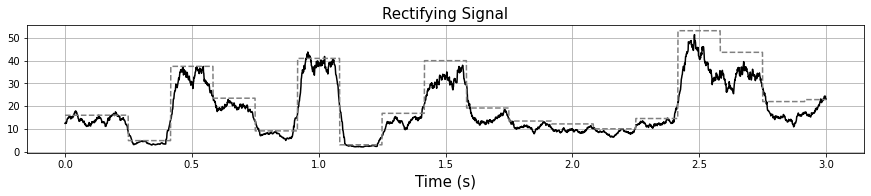

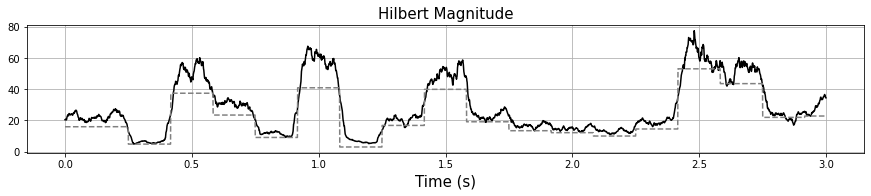

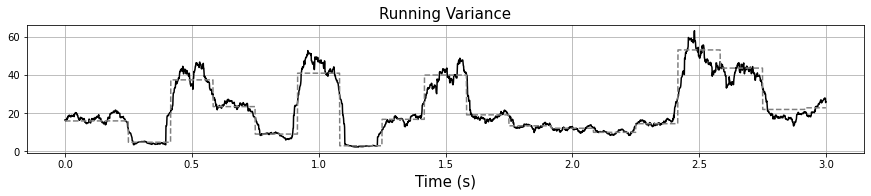

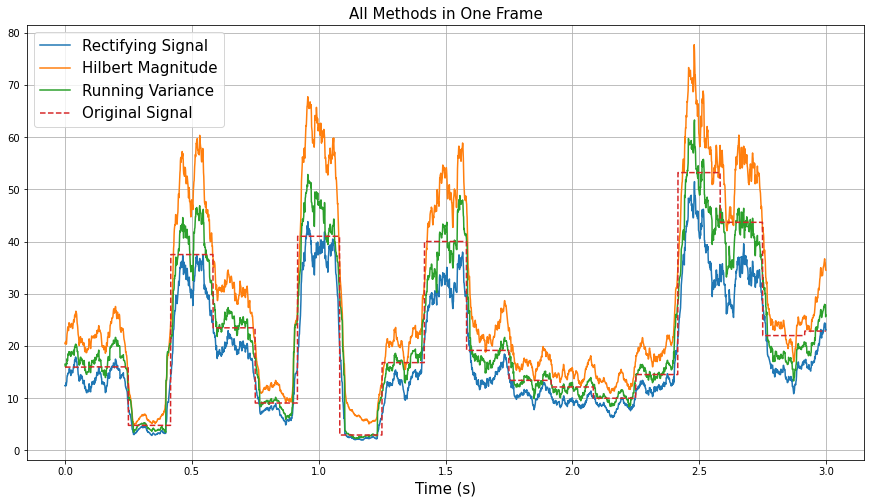

In [15]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.plot(time , rectsig_filt , c = 'black')
plt.plot(time  , signal , linestyle = 'dashed' , c='grey')
plt.title('Rectifying Signal' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.subplot(3,1,2)
plt.plot(time , maghilb_filt , c = 'black')
plt.plot(time  , signal , linestyle = 'dashed' , c='grey')
plt.title('Hilbert Magnitude' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.subplot(3,1,3)
plt.plot(time , run_var , c = 'black')
plt.plot(time  , signal , linestyle = 'dashed' , c='grey')
plt.title('Running Variance' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.grid()


plt.figure(figsize = (15,8))
plt.plot(time , rectsig_filt , label = 'Rectifying Signal')
plt.plot(time , maghilb_filt , label = 'Hilbert Magnitude')
plt.plot(time , run_var , label = 'Running Variance')
plt.plot(time  , signal , linestyle = 'dashed' , label = 'Original Signal')
plt.title('All Methods in One Frame' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

In [16]:
# Correlation Of Filters: 
rect_corr = np.corrcoef(signal , rectsig_filt)[1][0]
maghilb_corr = np.corrcoef(signal , maghilb_filt)[1][0]
run_var_corr = np.corrcoef(signal , run_var)[1][0]
corr_array_keys = ['Rectifying' , 'Hilbert' , 'Running Variance']
corr_array_vals = [rect_corr , maghilb_corr , run_var_corr]

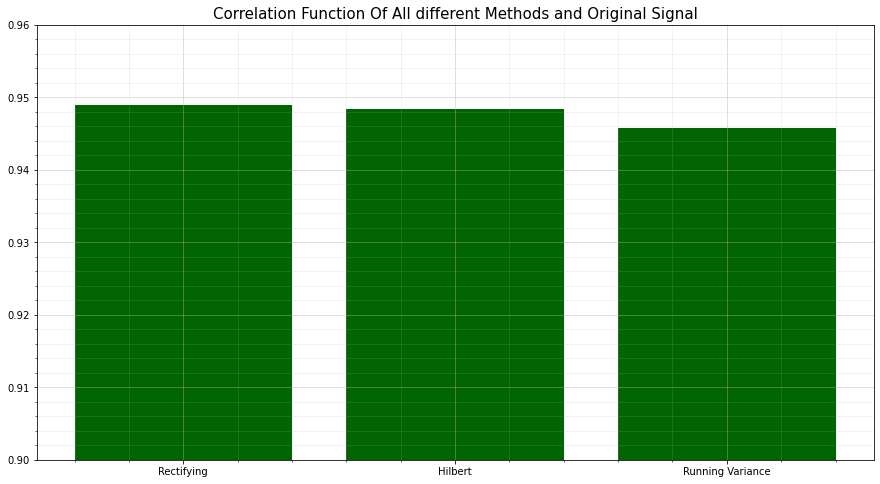

In [17]:
plt.figure(figsize = (15,8))
plt.bar(corr_array_keys , corr_array_vals , color = 'darkgreen')
plt.minorticks_on()
plt.title('Correlation Function Of All different Methods and Original Signal' , fontsize = 15)
plt.grid(b = True , which='minor', alpha=0.2)
plt.grid(b = True , which='major', alpha=0.5)
plt.ylim([0.9 , 0.96]);

## 3. Wavelet Convolution For Feature Extraction

In [18]:
# initial Values:
Npnts = 10000
k = 100

# Events:
event = np.diff(np.exp(-np.linspace(-2,2,k+1)**2))
event = event / np.max(event)

#Time:
time = np.linspace(-4,4,Npnts)

#Onset Times:
event_num = 30
onset_times = np.random.permutation(np.arange(Npnts))[:event_num]

#Data:
data = np.zeros(Npnts)
for i in range(event_num):
    if onset_times[i]+len(event) < Npnts:
        data[onset_times[i]:onset_times[i]+len(event)] = event

#Recevied Signal:
R = data + 0.1*np.random.randn(Npnts)
R2 = data + 1*np.random.randn(Npnts)

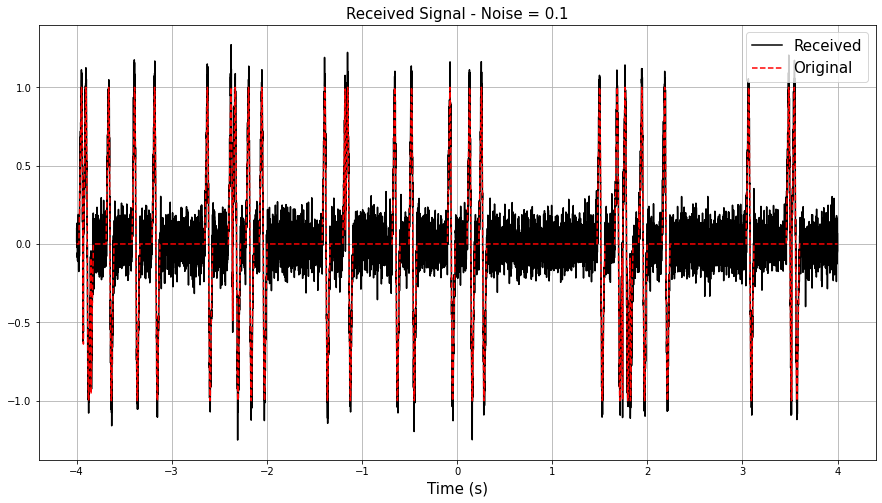

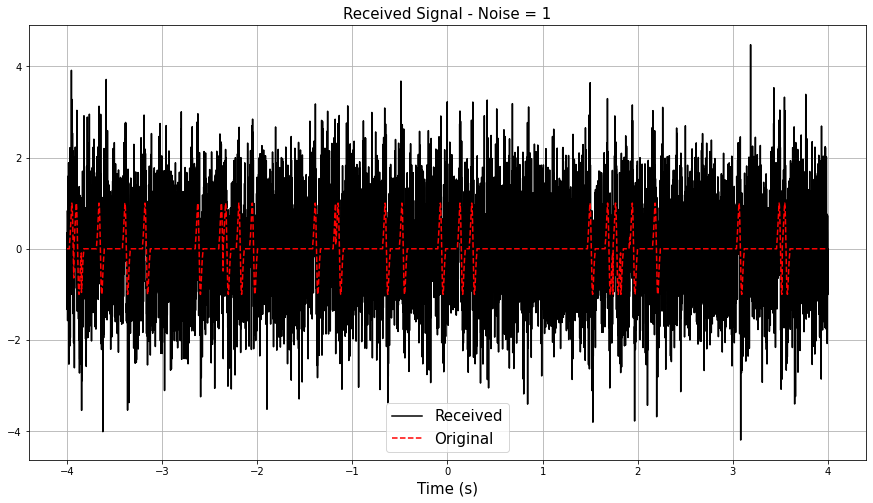

In [19]:
plt.figure(figsize = (15,8))
plt.plot(time , R , label = 'Received' , c='black')
plt.plot(time , data , label = 'Original' , c='r' , linestyle = 'dashed')
plt.xlabel('Time (s)' , fontsize = 15)
plt.title('Received Signal - Noise = 0.1' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

plt.figure(figsize = (15,8))
plt.plot(time , R2 , label = 'Received' , c='black')
plt.plot(time , data , label = 'Original' , c='r' , linestyle = 'dashed')
plt.xlabel('Time (s)' , fontsize = 15)
plt.title('Received Signal - Noise = 1' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

In [20]:
R_conv = np.convolve(R , event[::-1] , mode = 'same')
thr = 20 # By visual Inspection
R_conv_filt = np.zeros(len(R_conv)) 
for i in range(len(R_conv)):
    if R_conv[i] > thr:
        R_conv_filt[i] = R_conv[i]

stage_1 = np.diff(R_conv_filt)
stage_2 = np.sign(stage_1)
stage_3 = np.diff(stage_2)

time_local_max = np.array([])
R_local_max = np.array([])
data_matrix = np.array([])
for i in range(len(stage_3)):
    if stage_3[i] < 0:
        temp = np.argmin(np.abs(np.arange(len(R_conv_filt)) - i))
        time_local_max = np.append(time_local_max , temp)
        R_local_max = np.append(R_local_max , R_conv_filt[temp])
        #R_local_max = np.append(R_local_max , R[temp])
        if (temp - k/2 > 0) and (temp+k/2 < len(R_conv_filt)):
            data_matrix = np.append(data_matrix , R[temp - int(k/2):temp + int(k/2)] )
data_matrix = np.reshape(data_matrix , (-1,k))

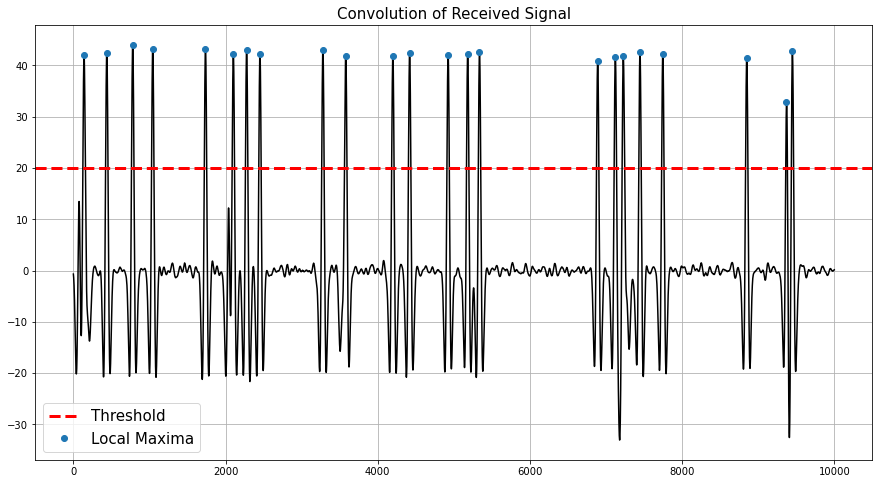

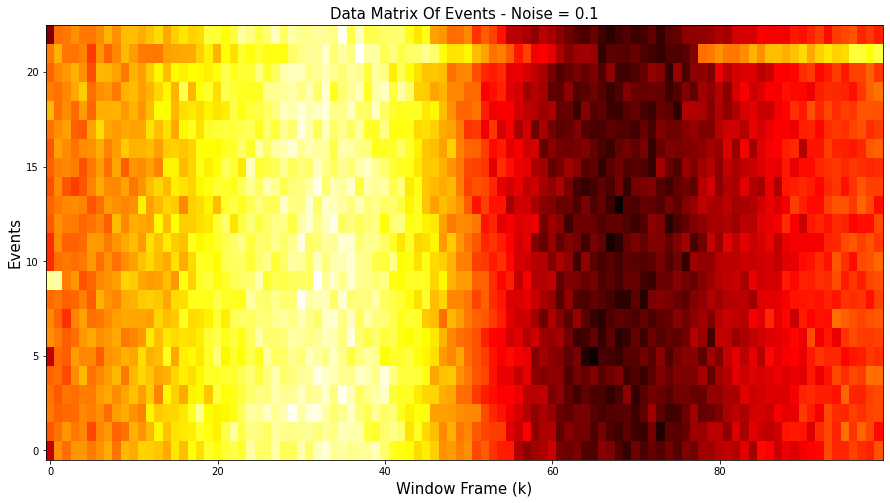

In [21]:
plt.figure(figsize = (15,8))
plt.plot(R_conv , c='black')
plt.axhline(y = thr , xmin = 0 , xmax = len(R_conv) , c='r' , linewidth = 3,
           linestyle = 'dashed' , label = 'Threshold')
plt.plot(time_local_max , R_local_max , marker = 'o' , linewidth = 0 , label='Local Maxima')
plt.title('Convolution of Received Signal' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

t, w = np.meshgrid(np.arange(data_matrix.shape[1]) , np.arange(data_matrix.shape[0]) )
plt.figure(figsize = (15,8))
plt.pcolormesh(t,w , data_matrix ,  cmap = 'hot' , shading='auto')
plt.title('Data Matrix Of Events - Noise = 0.1' , fontsize = 15)
plt.xlabel('Window Frame (k)' , fontsize = 15)
plt.ylabel('Events' , fontsize = 15);

In [22]:
R_conv = np.convolve(R2 , event[::-1] , mode = 'same')
thr = 25 # By visual Inspection
R_conv_filt = np.zeros(len(R_conv)) 
for i in range(len(R_conv)):
    if R_conv[i] > thr:
        R_conv_filt[i] = R_conv[i]

stage_1 = np.diff(R_conv_filt)
stage_2 = np.sign(stage_1)
stage_3 = np.diff(stage_2)

time_local_max = np.array([])
R_local_max = np.array([])
data_matrix2 = np.array([])
for i in range(len(stage_3)):
    if stage_3[i] < 0:
        temp = np.argmin(np.abs(np.arange(len(R_conv_filt)) - i))
        time_local_max = np.append(time_local_max , temp)
        R_local_max = np.append(R_local_max , R_conv_filt[temp])
        #R_local_max = np.append(R_local_max , R[temp])
        if (temp - k/2 > 0) and (temp+k/2 < len(R_conv_filt)):
            data_matrix2 = np.append(data_matrix2 , R2[temp - int(k/2):temp + int(k/2)] )
data_matrix2 = np.reshape(data_matrix2 , (-1,k))

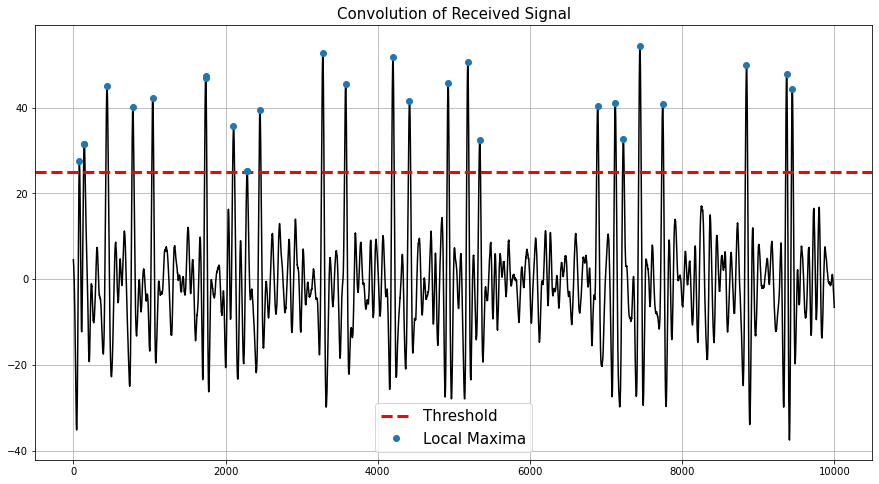

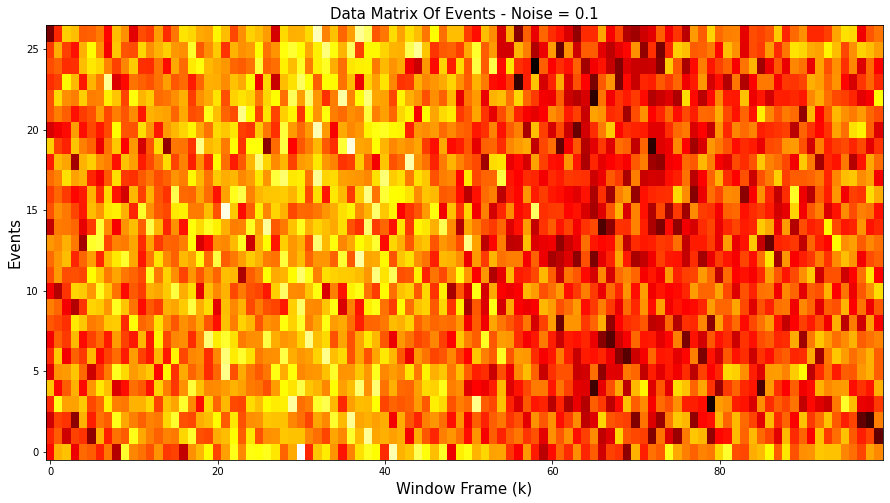

In [23]:
plt.figure(figsize = (15,8))
plt.plot(R_conv , c='black')
plt.axhline(y = thr , xmin = 0 , xmax = len(R_conv) , c='r' , linewidth = 3,
           linestyle = 'dashed' , label = 'Threshold')
plt.plot(time_local_max , R_local_max , marker = 'o' , linewidth = 0 , label='Local Maxima')
plt.title('Convolution of Received Signal' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

t, w = np.meshgrid(np.arange(data_matrix2.shape[1]) , np.arange(data_matrix2.shape[0]) )
plt.figure(figsize = (15,8))
plt.pcolormesh(t,w , data_matrix2 ,  cmap = 'hot' , shading='auto')
plt.title('Data Matrix Of Events - Noise = 0.1' , fontsize = 15)
plt.xlabel('Window Frame (k)' , fontsize = 15)
plt.ylabel('Events' , fontsize = 15);

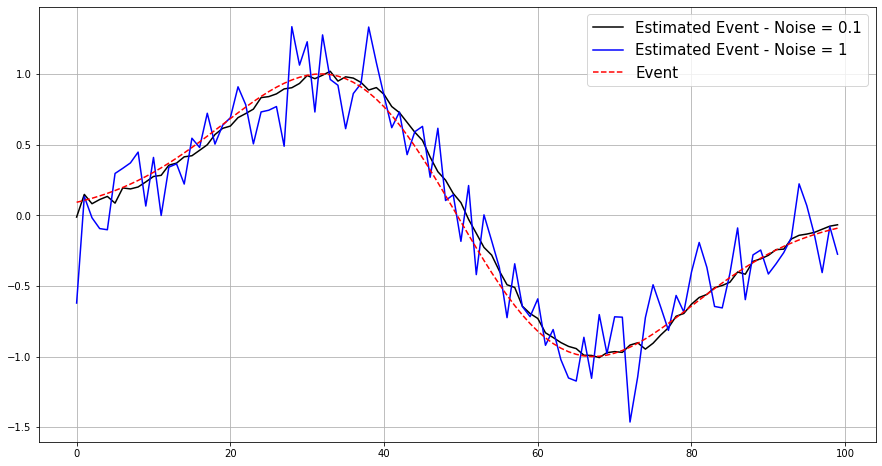

In [24]:
plt.figure(figsize = (15,8))
plt.plot(np.mean(data_matrix , 0) , label = 'Estimated Event - Noise = 0.1' , c = 'black')
plt.plot(np.mean(data_matrix2 , 0) , label = 'Estimated Event - Noise = 1' , c = 'b')
plt.plot(event , label = 'Event' , linestyle = 'dashed' , c = 'r')
plt.legend(fontsize = 15)
plt.grid()

## 4. Movement Detection in Signal using TKEO

In [56]:
Npnts = 10000
timevec = np.linspace(0,1,Npnts)
Trial_num = 100

event_matrix = np.zeros((Trial_num,Npnts))
signal_matrix = np.zeros((Trial_num,Npnts))
for i in range(Trial_num):
    # Event:
    event_time = np.random.randint(0.2*Npnts , 0.6*Npnts)/Npnts
    start_point = int(np.round(event_time*Npnts))
    k = int(0.2*Npnts)
    event = np.diff(np.exp(-np.linspace(-10,10,k)**2))
    event = event / np.max(event)
    event = np.append(np.zeros(start_point) , event)
    event = np.append(event , np.zeros(Npnts - len(event)))
    event_matrix[i,:] = event
    
    #Received Signal:
    signal = np.random.randint(1 , 15)/100*np.random.randn(Npnts) + event
    signal_matrix[i,:] = signal

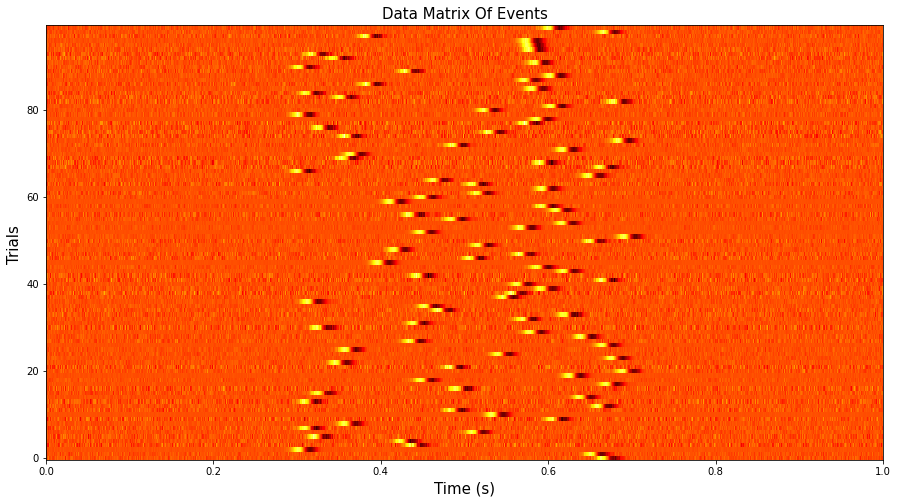

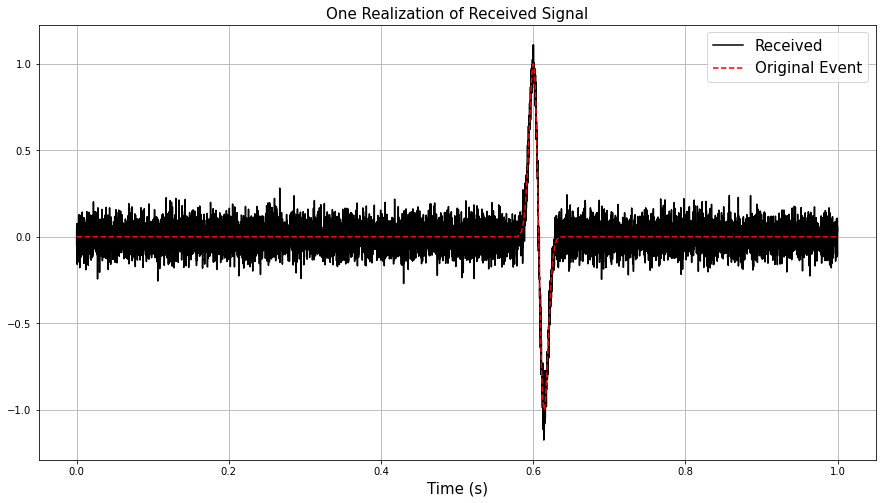

In [57]:
t, w = np.meshgrid(timevec , np.arange(Trial_num) )
plt.figure(figsize = (15,8))
plt.pcolormesh(t,w , signal_matrix ,  cmap = 'hot' , shading='auto')
plt.title('Data Matrix Of Events' , fontsize = 15)
plt.xlabel('Time (s)' , fontsize = 15)
plt.ylabel('Trials ' , fontsize = 15);


plt.figure(figsize = (15,8))
plt.plot(timevec , signal , label = 'Received' , c='black')
plt.plot(timevec , event , label = 'Original Event' , c='r' , linestyle = 'dashed')
plt.xlabel('Time (s)' , fontsize = 15)
plt.title('One Realization of Received Signal' , fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()

### 4.1. TKEO Method

In [58]:
TKEO_matrix = np.zeros((Trial_num,Npnts-2))
for i in range(Trial_num):
    signal = signal_matrix[i,:]
    TKEO = signal[1:len(signal)-1]**2 - signal[:len(signal)-2] * signal[2:]
    zscore = TKEO[0:np.argmin(np.abs(timevec-0.2))]
    TKEO = (TKEO - np.mean(zscore)) / np.sqrt(np.var(zscore))
    TKEO_matrix[i,:] = TKEO

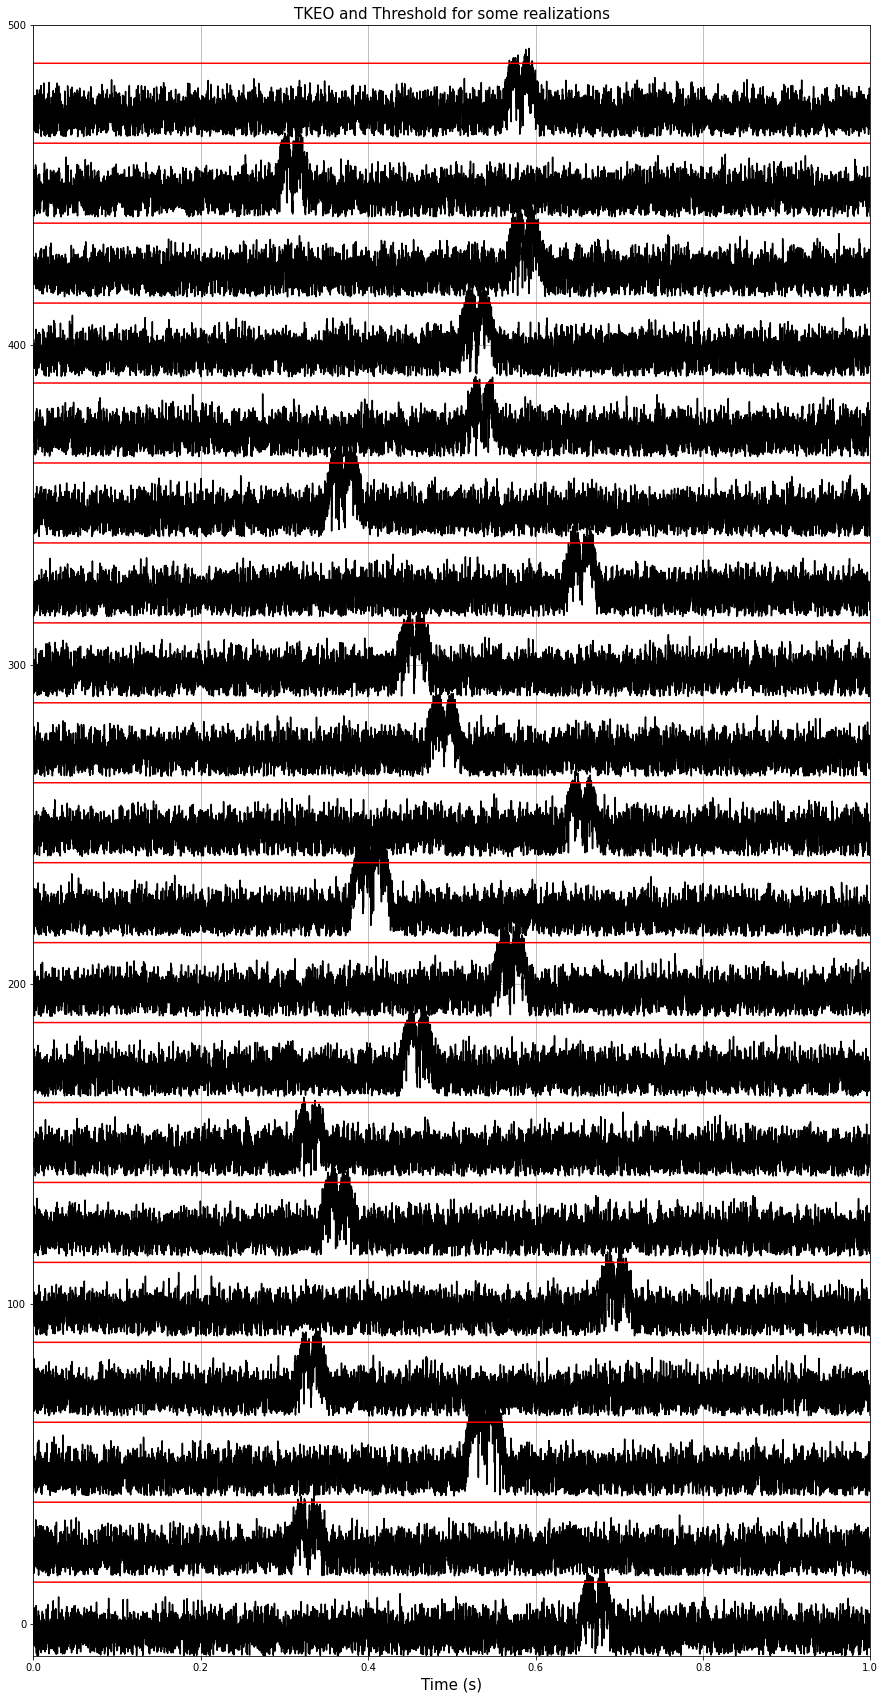

In [59]:
Threshold = 20
Start_points = []
plt.figure(figsize = (15,30))
for j in range(Trial_num):
    dummy = 0 
    for i in range(Npnts-2):
        if TKEO_matrix[j,i] > Threshold and dummy == 0:
            Start_points.append(i)
            dummy = 1 
    if j%5==0:
        plt.plot(np.arange(Npnts-2)/Npnts , 10*np.log10(np.abs(TKEO_matrix[j,:])+0.1)+5*j , c='black')
        plt.plot(np.arange(Npnts-2)/Npnts , 10*np.log10(0.1 + Threshold*np.ones((Npnts-2)))+5*j , c='r')

plt.xlabel('Time (s)' , fontsize = 15)
plt.title('TKEO and Threshold for some realizations' , fontsize = 15)
plt.xlim([0,1])
plt.ylim([-10,500])
#plt.legend(fontsize = 15)
plt.grid()

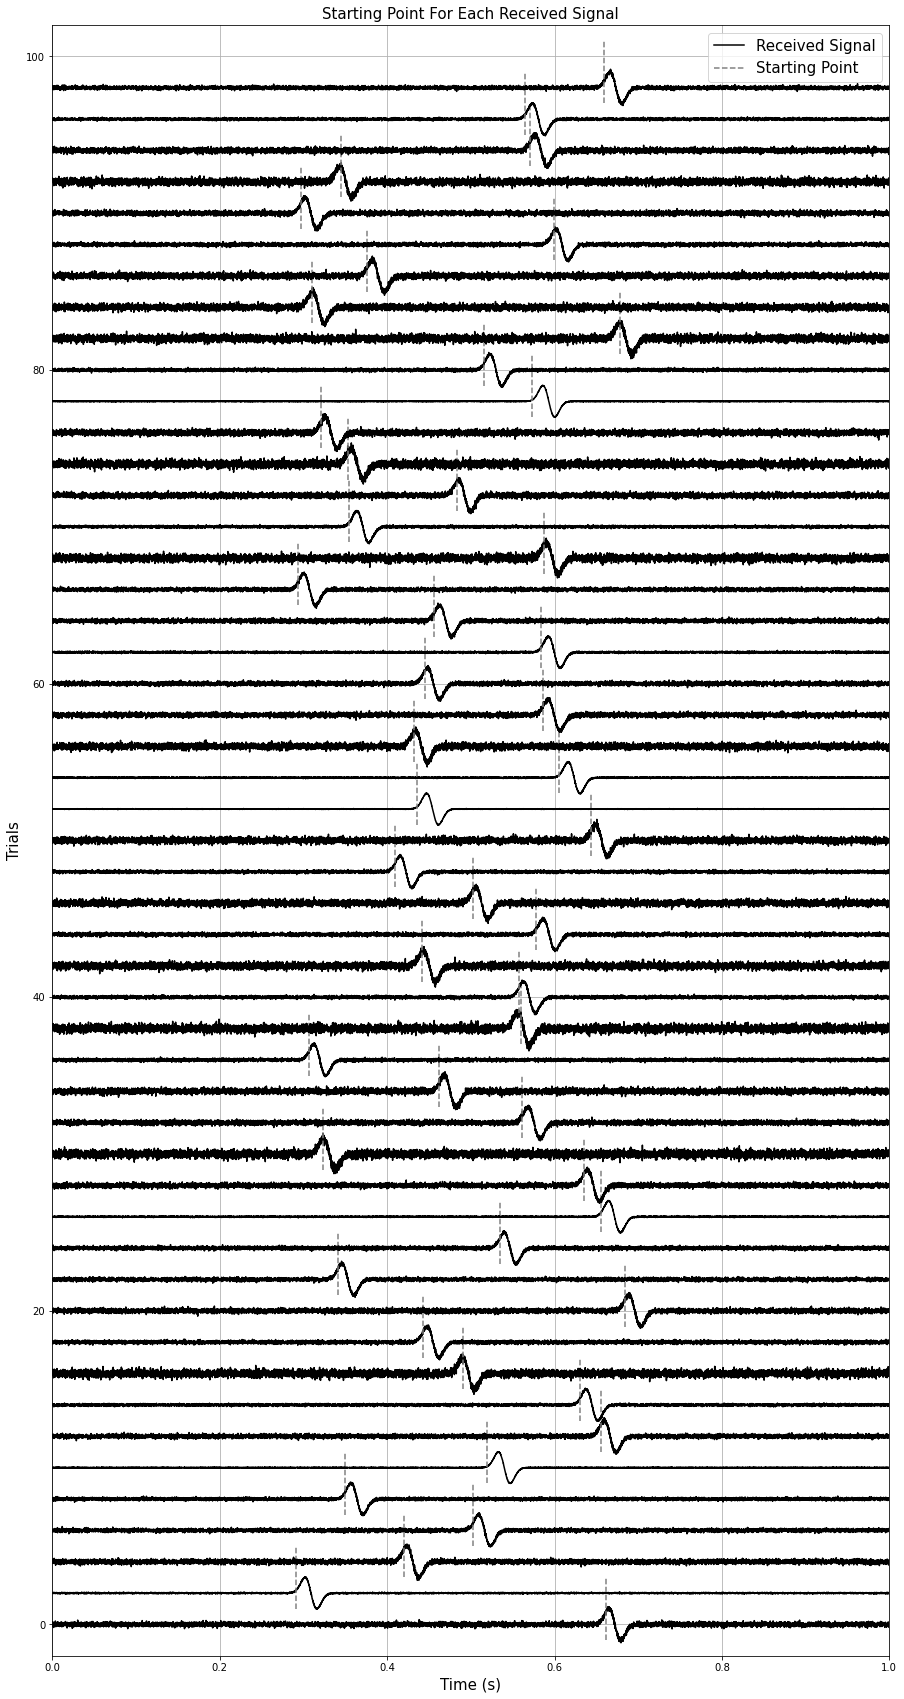

In [60]:
plt.figure(figsize = (15,30))
dummy = 0 
dummy_1 = 0
for j in range(Trial_num):
    if j%2==0:
        if dummy == 0 :
            plt.plot(timevec , signal_matrix[j]+j , c='black' , label = 'Received Signal')
            dummy = 1
        else:
            plt.plot(timevec , signal_matrix[j]+j , c='black' )
        if dummy_1 == 0:
            plt.plot([timevec[Start_points[j]] , timevec[Start_points[j]]] , [j-1 , j+3],
                     label = 'Starting Point' , linestyle = 'dashed' , c = 'grey')
            dummy_1 = 1
        else: 
            plt.plot([timevec[Start_points[j]] , timevec[Start_points[j]]] , [j-1 , j+3] , linestyle = 'dashed' , c = 'grey')

plt.xlabel('Time (s)' , fontsize = 15)
plt.title('Starting Point For Each Received Signal' , fontsize = 15)
plt.ylabel('Trials' , fontsize = 15)
plt.xlim([0,1])
plt.ylim([-2,102])
plt.legend(fontsize = 15)
plt.grid()